In [1]:
def libsLSTM():
    import math
    import numpy as np
    import pandas as pd
    import seaborn as sns
    from pandas_datareader import data as pdr
    import yfinance as yf
    from sklearn.preprocessing import MinMaxScaler
    from keras.models import Sequential
    from keras.layers import Dense,LSTM
    import matplotlib.pyplot as plt
    import plotly.graph_objects as go
    plt.style.use('fivethirtyeight')
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_log_error

In [2]:
def libsExpSmt():
    import pandas as pd
    import datetime
    from pandas import Series
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    from statsmodels.tsa.filters.hp_filter import hpfilter
    from statsmodels.tsa.seasonal import seasonal_decompose
    from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from math import sqrt


In [3]:
def libsConvNeural():
    import tensorflow as tf
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error,median_absolute_error,r2_score

### Importando dados

In [4]:
def importCaseData():
    import pandas
    from pandas import read_csv
    from urllib.request import urlretrieve
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
    urlretrieve(url, 'datasets/casos_covid19.csv')
    df_covid = pandas.read_csv('datasets/casos_covid19.csv')
    df_covid.drop(['Lat', 'Long'], axis=1, inplace=True)
    df_country = df_covid.groupby('Country/Region').sum()
    return df_country

In [5]:
def importDeathData():
    import pandas
    from pandas import read_csv
    from urllib.request import urlretrieve
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
    urlretrieve(url, 'datasets/mortes_covid19.csv')
    df_covid = pandas.read_csv('datasets/mortes_covid19.csv')
    df_covid.drop(['Lat', 'Long'], axis=1, inplace=True)
    df_country = df_covid.groupby('Country/Region').sum()
    return df_country

# Coletando dados do DataFrame 
### (Getting the DataFrame data)

In [6]:
#Dados de mortes (Death's data)
df_deaths = importDeathData()
df_deaths

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/9/22,2/10/22,2/11/22,2/12/22,2/13/22,2/14/22,2/15/22,2/16/22,2/17/22,2/18/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,7465,7477,7478,7488,7494,7501,7504,7513,7524,7526
Albania,0,0,0,0,0,0,0,0,0,0,...,3399,3402,3402,3407,3410,3414,3420,3423,3430,3432
Algeria,0,0,0,0,0,0,0,0,0,0,...,6678,6690,6703,6715,6729,6744,6753,6762,6772,6780
Andorra,0,0,0,0,0,0,0,0,0,0,...,148,148,148,148,148,149,150,150,150,150
Angola,0,0,0,0,0,0,0,0,0,0,...,1896,1897,1898,1898,1898,1898,1899,1899,1899,1899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,5196,5215,5215,5215,5215,5283,5296,5320,5339,5357
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,2090,2093,2100,2102,2103,2107,2107,2113,2114,2115


In [7]:
#Dados de casos (Case's data)
df_cases = importCaseData()
df_cases

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/9/22,2/10/22,2/11/22,2/12/22,2/13/22,2/14/22,2/15/22,2/16/22,2/17/22,2/18/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,168550,169448,169940,170152,170604,171246,171422,171519,171673,171857
Albania,0,0,0,0,0,0,0,0,0,0,...,266416,267020,267020,267551,268008,268304,268491,268940,269301,269601
Algeria,0,0,0,0,0,0,0,0,0,0,...,259673,260191,260723,261226,261752,262165,262570,262994,263369,263685
Andorra,0,0,0,0,0,0,0,0,0,0,...,36989,37074,37140,37140,37140,37277,37361,37452,37522,37589
Angola,0,0,0,0,0,0,0,0,0,0,...,98453,98474,98501,98514,98514,98514,98555,98568,98585,98605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,594037,600128,600128,600128,600128,613846,618527,622175,625028,627956
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,465,465,490,498,501,501,505,507,507,508
Yemen,0,0,0,0,0,0,0,0,0,0,...,11579,11604,11659,11664,11671,11679,11699,11707,11718,11731


### Selecionando países para análise (Selecting countries for analysis)

In [8]:
#Casos - Países selecionados (Cases - Contries selecteds)
sc_brazil = df_cases.loc['Brazil']
sc_india = df_cases.loc['India']
sc_us = df_cases.loc['US']
sc_italy = df_cases.loc['Italy']
sc_brazil = sc_brazil[sc_brazil > 0]
sc_india = sc_india[sc_india > 0]
sc_italy = sc_italy[sc_italy > 0]
sc_us = sc_us[sc_us > 0]

In [9]:
#Mortes - Países selecionados (Deaths - Countries selecteds)
sd_brazil = df_deaths.loc['Brazil']
sd_india = df_deaths.loc['India']
sd_us = df_deaths.loc['US']
sd_italy = df_deaths.loc['Italy']
sd_brazil = sd_brazil[sd_brazil > 0]
sd_india = sd_india[sd_india > 0]
sd_italy = sd_italy[sd_italy > 0]
sd_us = sd_us[sd_us > 0]

ValueError: x and y must have same first dimension, but have shapes (759,) and (750,)

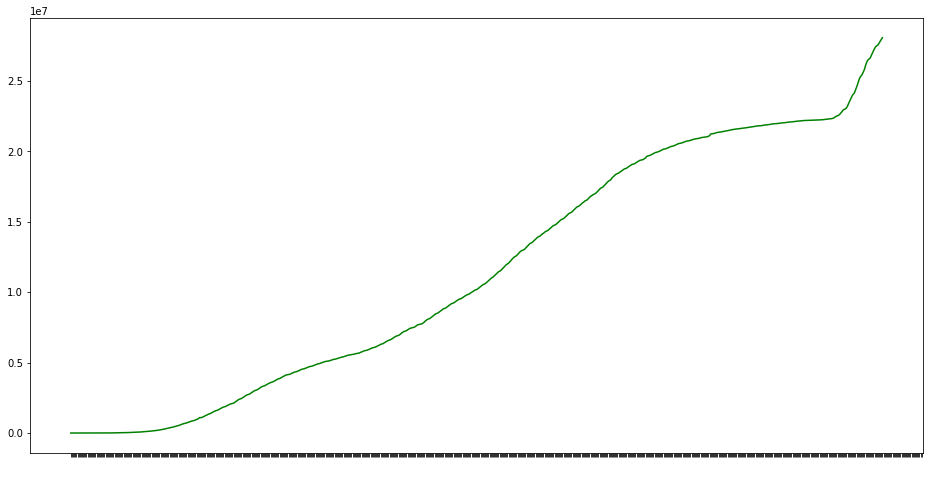

In [10]:
#Plotando valores de casos - Ploting cases values
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.xticks(color='w')
plt.plot(sc_brazil.index, sc_brazil.values, label = 'Brasil', color = 'green')
plt.plot(sc_us.index, sc_italy.values, label = 'Itália', color = 'yellow')
plt.plot(sc_india.index, sc_india.values, label = 'Índia', color = 'blue')
plt.plot(sc_us.index, sc_us.values, label = 'EUA', color = 'red')
plt.title('Total de casos confirmados de COVID-19 de Brasil, Índia, Itália e EUA', size = 15)
plt.xlabel("2020-2021", size = 15)
plt.ylabel("Total de infectados", size = 15)
plt.legend()
plt.show()

In [ ]:
#Plotando valores de mortes - Ploting death values
plt.figure(figsize=(16,8))
plt.xticks(color='w')
plt.plot(sd_brazil.index, sd_brazil.values, label = 'Brasil', color = 'green')
plt.plot(sd_us.index, sd_italy.values, label = 'Itália', color = 'yellow')
plt.plot(sd_india.index, sd_india.values, label = 'Índia', color = 'blue')
plt.plot(sd_us.index, sd_us.values, label = 'EUA', color = 'red')
plt.title('Total de mortes por COVID-19 de Brasil, Índia, Itália e EUA', size = 15)
plt.xlabel("2020-2021", size = 15)
plt.ylabel("Mortes", size = 15)
plt.legend()
plt.show()

In [ ]:
#Criando DataFrame dos países - Casos (Creating countries DataFrame - Cases)
import pandas
df_cases_brazil = pandas.DataFrame(sc_brazil.values, sc_brazil.index)
df_cases_brazil.columns.name="Date"
df_cases_brazil = df_cases_brazil.rename(columns={0: 'Cases'})
df_cases_india = pandas.DataFrame(sc_india.values, sc_india.index)
df_cases_india.columns.name="Date"
df_cases_india = df_cases_india.rename(columns={0: 'Cases'})
df_cases_us = pandas.DataFrame(sc_us.values, sc_us.index)
df_cases_us.columns.name="Date"
df_cases_us = df_cases_us.rename(columns={0: 'Cases'})
df_cases_italy = pandas.DataFrame(sc_italy.values, sc_italy.index)
df_cases_italy.columns.name="Date"
df_cases_italy = df_cases_italy.rename(columns={0: 'Cases'})

In [ ]:
#Criando DataFrame dos países - Mortes (Creating countries DataFrame - Deaths)
import pandas
df_deaths_brazil = pandas.DataFrame(sd_brazil.values, sd_brazil.index)
df_deaths_brazil.columns.name="Date"
df_deaths_brazil = df_deaths_brazil.rename(columns={0: 'Deaths'})
df_deaths_india = pandas.DataFrame(sd_india.values, sd_india.index)
df_deaths_india.columns.name="Date"
df_deaths_india = df_deaths_india.rename(columns={0: 'Deaths'})
df_deaths_us = pandas.DataFrame(sd_us.values, sd_us.index)
df_deaths_us.columns.name="Date"
df_deaths_us = df_deaths_us.rename(columns={0: 'Deaths'})
df_deaths_italy = pandas.DataFrame(sd_italy.values, sd_italy.index)
df_deaths_italy.columns.name="Date"
df_deaths_italy = df_deaths_italy.rename(columns={0: 'Deaths'})

## Implementação modelo ARIMA

In [ ]:
#Importando bibliotecas (Importing libs)
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.stats.stattools import jarque_bera
import matplotlib.pyplot as plt
%matplotlib inline
from pmdarima.arima import auto_arima

In [ ]:
#Auto ARIMA
stepwise=auto_arima(df_cases_brazil,start_p=1,start_q=1,max_p=6,max_q=6,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,
                    error_action='ignore',suppress_warnings=True,stepwise=True)